<div id="top">
<a href="https://www.kaggle.com/c/house-prices-advanced-regression-techniques"><h1>House Prices Prediction</h1></a>
<br>
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

<table><tr>
<td> <img src="images/House.jpe" alt="House For Sale" style="width: 400px;height:200px"/> </td>
<td> <img src="images/House3.png" alt="House Price" style="width: 400px;height:200px"/> </td>
</tr></table>

<h3>Project Objective:</h3>
<br>
This Project is to understand how Advanced ML techniques could be used to predict the house prices based on a lot of features.Here we will be using mostly ensemble methods.

<h3>Technologies and Environment Used:</h3>
<img src="images/Technologies4.jpg" alt="Libraries used" style="width: 400px;height:160px"/> 


<h3><u><i>Project Pipeline</h3>
<ol><h3>
<li>Importing Data and Libraries</li>
<li>Exploratary Data Analysis</li>
<li>Feature Engineering</li>
<li>Feature Extraction</li>
<li>Building Model & Model Tuning</li>
<li>Stacking and Blending</li>
<li>Learnings & Conclusion</li>
<li>Credits & References</li>
</h3></ol>
<h3>Want to learn more: <a href="https://github.com/vishalgarg1994/Data-Science-Portfolio"> https://github.com/vishalgarg1994/Data-Science-Portfolio</a></h3>
</div>

<hr></hr>
<h3>1. Importing Data and Libraries</h3>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,StackingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from scipy import stats

In [2]:
# The data is already split into train and test
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

<h3>2. Exploratory Data Analysis</h3>

In [3]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<a href="https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data"><h3>Features Description</h3></a>

<h4>Checking for null values </h4>

In [5]:
# Columns having null values
train.columns[train.isnull().any(axis=0)]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [6]:
print(train.columns[round(100*train.isnull().sum()/len(train.index),2) > 70])
print(test.columns[round(100*test.isnull().sum()/len(test.index),2) > 70])

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')
Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


<h4>Above 4 columns can be easily dropped as more than 70% of values are Nulls so this doesn't give much info. Also we need to delete the id column as this doesn't create any value for the model.</h4>

In [8]:
# No of rows having more than 50% nulls
sum(round(100*train.isna().sum(axis=1)/train.shape[1],2) >30)

0

<h4>There is no row having more than 30% Nulls so we won't be deleting any row at all</h4>
<h4>Created the copies of train and test,if in case, we need </h4>

In [4]:
train_copy = train.copy()
test_copy = test.copy()

Text(0.5, 1.0, 'Count of null values')

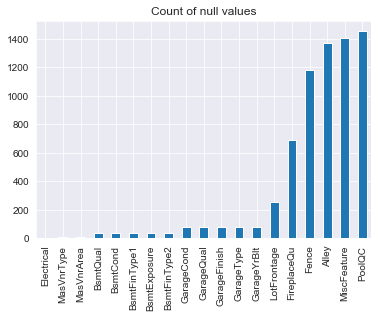

In [12]:
sns.set_style('darkgrid')
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
plt.title("Count of null values")

<h3>3. Feature Engineering<h3>

In [5]:
# Taking out the Target Variable
output_var = train.pop('SalePrice')

Text(0.5, 1.0, 'Target variable Distribution')

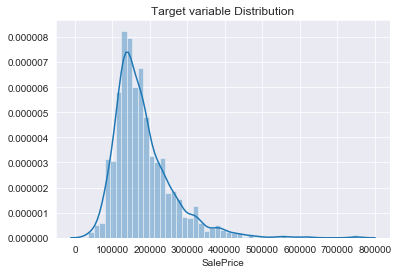

In [49]:
sns.distplot(output_var)
plt.title("Target variable Distribution")

<h4>Dropping the irrelevant cols and cols having large null values</h4>

In [6]:
cols_to_drop = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature','Id']
train.drop(cols_to_drop,inplace=True,axis=1)
test.drop(cols_to_drop,inplace=True,axis=1)

<h3> Handling Missing Values <h3>
<h5>This Function will give all the column names where nulls are present either in train or test</h5>

In [7]:
def updatenulldf():
    '''
        This Function will give all the column names where nulls are present either in train or test
    '''
    a = pd.DataFrame(train.isnull().sum(),columns=['train'])
    b = pd.DataFrame(test.isnull().sum(),columns=['test'])
    df = pd.concat([a,b],axis=1)
    df.sort_values(by=['train','test'],ascending=False,inplace=True)
    df['Processed ?'] = df['train']+df['test']
    df['Processed ?'] = df['Processed ?'].apply(lambda x : "No" if x>0 else "Yes")
    df = df.loc[df['Processed ?']=="No"].sort_values(by=['train','test'])
    return df

In [8]:
nulldf = updatenulldf()
nulldf.head()

,train,test,Processed ?
Exterior1st,0,1,No
Exterior2nd,0,1,No
BsmtFinSF1,0,1,No
BsmtFinSF2,0,1,No
BsmtUnfSF,0,1,No


<h5>Getting only those cols where we need to do processing null for test dataset only</h5>

In [9]:
cols = nulldf.loc[nulldf.train==0].index
test[cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Exterior1st   1458 non-null   object 
 1   Exterior2nd   1458 non-null   object 
 2   BsmtFinSF1    1458 non-null   float64
 3   BsmtFinSF2    1458 non-null   float64
 4   BsmtUnfSF     1458 non-null   float64
 5   TotalBsmtSF   1458 non-null   float64
 6   KitchenQual   1458 non-null   object 
 7   GarageCars    1458 non-null   float64
 8   GarageArea    1458 non-null   float64
 9   SaleType      1458 non-null   object 
 10  Utilities     1457 non-null   object 
 11  BsmtFullBath  1457 non-null   float64
 12  BsmtHalfBath  1457 non-null   float64
 13  Functional    1457 non-null   object 
 14  MSZoning      1455 non-null   object 
dtypes: float64(8), object(7)
memory usage: 171.1+ KB


In [10]:
float_cols = test[cols].select_dtypes(include=['float64']).columns
object_cols=test[cols].select_dtypes(include=['object']).columns

<h5>Filling all numeric values with median and Object values with Mode. Since in these columns the missing values are very less so we can afford doing it this way.</h5>

In [11]:
for col in float_cols:
    test[col] = test[col].fillna((test[col].dropna().median()))
for col in object_cols:
    value_to_fill = test[col].dropna().mode().to_string(index=False).strip()
    test[col] = test[col].fillna(value_to_fill)

<h5>Getting only those cols where we need to do processing null for train dataset only</h5>

In [12]:
cols = nulldf.loc[nulldf.test==0].index
train[cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Electrical  1459 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


In [13]:
col = 'Electrical'
value_to_fill = train[col].dropna().mode().to_string(index=False).strip()
train[col] = train[col].fillna(value_to_fill)

In [14]:
nulldf = updatenulldf()
nulldf.head()

,train,test,Processed ?
MasVnrArea,8,15,No
MasVnrType,8,16,No
BsmtFinType1,37,42,No
BsmtQual,37,44,No
BsmtCond,37,45,No


<h4> Processing MasVnrType,MasVnrArea </h4>
<br>
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None  	None
       Stone	Stone

MasVnrArea: Masonry veneer area in square feet

In [25]:
train[['MasVnrType','MasVnrArea']].head()

,MasVnrType,MasVnrArea
0,BrkFace,196.0
1,None,0.0
2,BrkFace,162.0
3,None,0.0
4,BrkFace,350.0


In [26]:
train[['MasVnrType','MasVnrArea']].groupby('MasVnrType')['MasVnrArea'].mean()

MasVnrType
BrkCmn     247.666667
BrkFace    259.008989
None         1.094907
Stone      239.304688
Name: MasVnrArea, dtype: float64

In [27]:
train['MasVnrType'].mode()

0    None
dtype: object

<h5>We are filling the data according to None value as when value isn't present that means it is None</h5>

In [15]:
train['MasVnrType'] = train['MasVnrType'].fillna('None')
train['MasVnrArea'] = train['MasVnrArea'].fillna(1.094907)
test['MasVnrType'] = test['MasVnrType'].fillna('None')
test['MasVnrArea'] = test['MasVnrArea'].fillna(1.094907)

In [29]:
nulldf = updatenulldf()
nulldf

,train,test,Processed ?
BsmtFinType1,37,42,No
BsmtQual,37,44,No
BsmtCond,37,45,No
BsmtFinType2,38,42,No
BsmtExposure,38,44,No
GarageType,81,76,No
GarageYrBlt,81,78,No
GarageFinish,81,78,No
GarageQual,81,78,No
GarageCond,81,78,No


<h4> Now we need to fill all the Basement variables</h4>

    BsmtCond: Evaluates the general condition of the basement
       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
    
    BsmtExposure: Refers to walkout or garden level walls
       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
       
    BsmtFinType2: Rating of basement finished area (if multiple types)
       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
       
    BsmtFinType1: Rating of basement finished area
       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
  
    BsmtQual: Height of the basement

In [30]:
train['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

<h5>As per my Data understanding the Basement columns are null where there is no basement at all. Let's Check</h5>

In [16]:
basement_train = train[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']]
basement_test = test[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']]

In [32]:
print(sum(basement_train.isnull().all(axis=1)))
print(sum(basement_test.isnull().all(axis=1)))

37
42


In [33]:
basement_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   BsmtQual      1423 non-null   object
 1   BsmtCond      1423 non-null   object
 2   BsmtExposure  1422 non-null   object
 3   BsmtFinType1  1423 non-null   object
 4   BsmtFinType2  1422 non-null   object
dtypes: object(5)
memory usage: 57.2+ KB


<h5>Now we can just Fillin null values as 'NA', which refers to No Basement in data dictionary, for all the above cols for train and test</h5>

In [17]:
basement_cols = basement_train.columns
for col in basement_cols:
    train[col] = train[col].fillna('NA')
    test[col] = test[col].fillna('NA')

In [35]:
nulldf = updatenulldf()
nulldf

,train,test,Processed ?
GarageType,81,76,No
GarageYrBlt,81,78,No
GarageFinish,81,78,No
GarageQual,81,78,No
GarageCond,81,78,No
LotFrontage,259,227,No
FireplaceQu,690,730,No
Fence,1179,1169,No
Alley,1369,1352,No
MiscFeature,1406,1408,No


<h3>Now we can take care of Garage Column</h3>

     GarageType: Garage location		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
     GarageYrBlt: Year garage was built
		
     GarageFinish: Interior finish of the garage
       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
       
     GarageQual: Garage quality
       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
    GarageCond: Garage condition
       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
       
As per my Data understanding the Garage columns are null where there is no basement at all. Let's Check

In [18]:
garage_train = train[['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']]
garage_test = test[['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']]

In [37]:
garage_train['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [38]:
print(sum(garage_train.isnull().all(axis=1)))
print(sum(garage_test.isnull().all(axis=1)))

81
76


In [19]:
float_cols = garage_train.select_dtypes(include=['float64']).columns
object_cols = garage_train.select_dtypes(include=['object']).columns

In [40]:
print(garage_train['GarageYrBlt'].min())
print(garage_train['GarageYrBlt'].max())
object_cols

1900.0
2010.0


Index(['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'], dtype='object')

In [20]:
for col in object_cols:
    train[col] = train[col].fillna('NA')
    test[col] = test[col].fillna('NA')
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(0)
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(0)

In [21]:
nulldf = updatenulldf()
nulldf

,train,test,Processed ?
LotFrontage,259,227,No


<h5>LotFrontage: Linear feet of street connected to property</h5>

In [22]:
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
test['LotFrontage'] = test.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [23]:
nulldf = updatenulldf()
nulldf

,train,test,Processed ?


<h4>Now we have processed with all the vars.Let's add some extra variables that can add value to model learning</h4>

In [24]:
combined = pd.concat([train,test],axis=0)
combined = combined.reset_index(drop=True)

<h5>haspool: House is having pool or not</h5>
<h5>has2ndfloor: Second floor present or not</h5>
<h5>hasgarage: Is Garage there</h5>
<h5>hasbsmt: Is basement there</h5>
<h5>hasfireplace: does this house has fireplace</h5>
<h5>TotalSF: what is the total Surface area</h5>
<h5>Total_sqr_footage: Total are in square feet</h5>
<h5>Total_Bathrooms: No.of bathrooms</h5>
<h5>Total_porch_sf: Porch surface area</h5>


In [29]:
combined['haspool'] = combined['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
combined['has2ndfloor'] = combined['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
combined['hasgarage'] = combined['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
combined['hasbsmt'] = combined['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
combined['hasfireplace'] = combined['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
combined['TotalSF']=combined['TotalBsmtSF'] + combined['1stFlrSF'] + combined['2ndFlrSF']
combined['Total_sqr_footage'] = (combined['BsmtFinSF1'] + combined['BsmtFinSF2'] +
                                 combined['1stFlrSF'] + combined['2ndFlrSF'])

combined['Total_Bathrooms'] = (combined['FullBath'] + (0.5 * combined['HalfBath']) +
                               combined['BsmtFullBath'] + (0.5 * combined['BsmtHalfBath']))

combined['Total_porch_sf'] = (combined['OpenPorchSF'] + combined['3SsnPorch'] +
                              combined['EnclosedPorch'] + combined['ScreenPorch'] +
                              combined['WoodDeckSF'])

<h5>Checking for skewness of Variables. Variables those are having skew value > 0.5 are skewed and normalized boxcox_normmax</h5>
<br>
Links to scipy functions
<br>
<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html"><h4>skew</h4></a>
<br>
<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.boxcox1p.html">boxcox1p</a>
<br>
<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox_normmax.html">boxcox_normmax</a>
<br>

In [25]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in combined.columns:
    if combined[i].dtype in numeric_dtypes:
        numerics2.append(i)
skew_features = combined[numerics2].apply(lambda x: stats.skew(x)).sort_values(ascending=False)

skew_features

MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931594
MasVnrArea        2.613707
OpenPorchSF       2.535114
WoodDeckSF        1.842433
LotFrontage       1.498578
1stFlrSF          1.469604
BsmtFinSF1        1.425407
MSSubClass        1.375457
GrLivArea         1.269358
TotalBsmtSF       1.162619
BsmtUnfSF         0.919715
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.624832
OverallCond       0.570312
BedroomAbvGr      0.326324
GarageArea        0.241184
OverallQual       0.197110
MoSold            0.195884
FullBath          0.167606
YrSold            0.132399
GarageCars       -0.218593
YearRemodAdd     -0.451020
YearBuilt        -0.599806
GarageYrBlt      -3.906205
dtype: float64

In [26]:
high_skew = skew_features[skew_features > 0.5]
high_skew

MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931594
MasVnrArea        2.613707
OpenPorchSF       2.535114
WoodDeckSF        1.842433
LotFrontage       1.498578
1stFlrSF          1.469604
BsmtFinSF1        1.425407
MSSubClass        1.375457
GrLivArea         1.269358
TotalBsmtSF       1.162619
BsmtUnfSF         0.919715
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.624832
OverallCond       0.570312
dtype: float64

In [27]:
skew_index = high_skew.index
skew_index

Index(['MiscVal', 'PoolArea', 'LotArea', 'LowQualFinSF', '3SsnPorch',
       'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch', 'ScreenPorch',
       'BsmtHalfBath', 'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF',
       'LotFrontage', '1stFlrSF', 'BsmtFinSF1', 'MSSubClass', 'GrLivArea',
       'TotalBsmtSF', 'BsmtUnfSF', '2ndFlrSF', 'TotRmsAbvGrd', 'Fireplaces',
       'HalfBath', 'BsmtFullBath', 'OverallCond'],
      dtype='object')

In [28]:
from scipy import special
for i in skew_index:
   combined[i] = special.boxcox1p(combined[i], stats.boxcox_normmax(combined[i] + 1))

In [137]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 83 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSSubClass         2919 non-null   float64
 1   MSZoning           2919 non-null   object 
 2   LotFrontage        2919 non-null   float64
 3   LotArea            2919 non-null   float64
 4   Street             2919 non-null   object 
 5   LotShape           2919 non-null   object 
 6   LandContour        2919 non-null   object 
 7   Utilities          2919 non-null   object 
 8   LotConfig          2919 non-null   object 
 9   LandSlope          2919 non-null   object 
 10  Neighborhood       2919 non-null   object 
 11  Condition1         2919 non-null   object 
 12  Condition2         2919 non-null   object 
 13  BldgType           2919 non-null   object 
 14  HouseStyle         2919 non-null   object 
 15  OverallQual        2919 non-null   int64  
 16  OverallCond        2919 

<h4>Let's visulaize how house price varies with some of its features</h4>

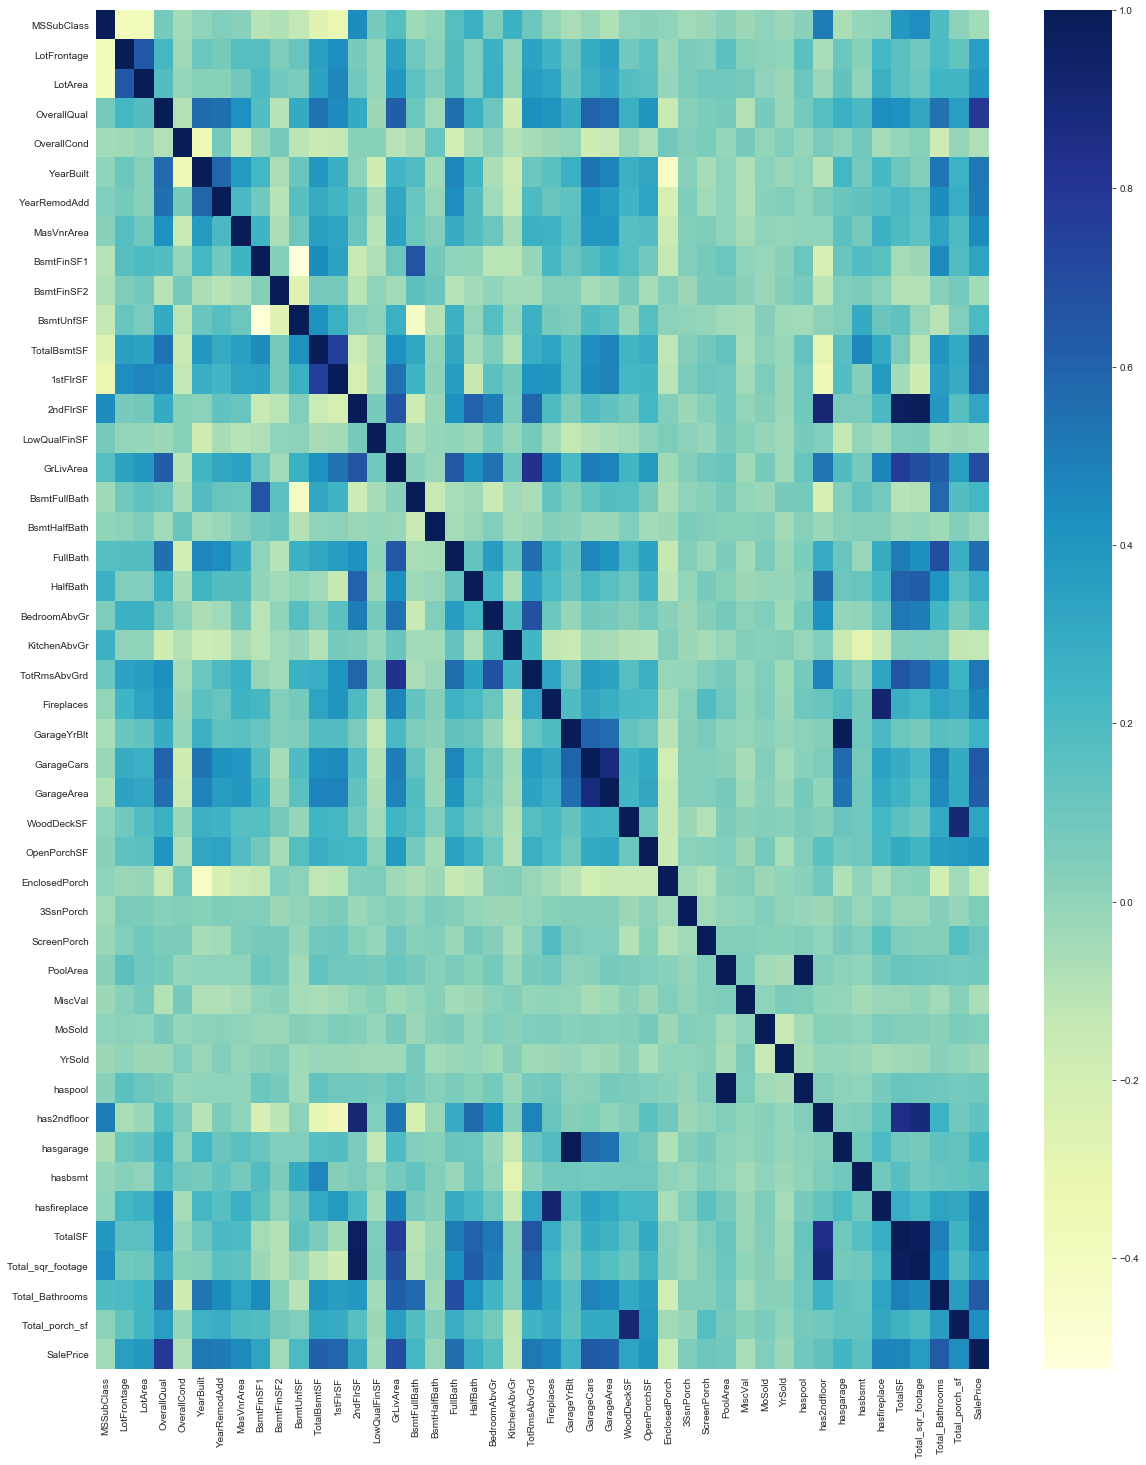

In [141]:
train_vis = combined[0:1460:]
train_vis['SalePrice'] = output_var
f, axes = plt.subplots(0, 0, figsize=(20, 25))
sns.heatmap(train_vis.corr(),cmap='YlGnBu')

<h5>Overall condition is a very positive relation with the SalePrice</h5>

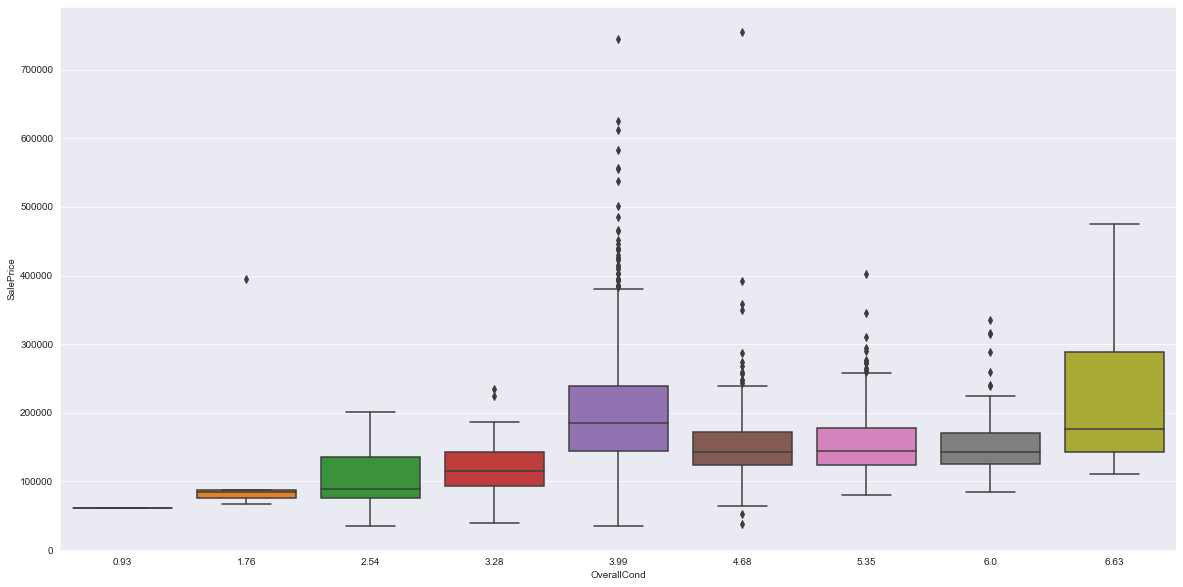

In [147]:
plt.figure(figsize = (20,10))
sns.boxplot(round(train_vis.OverallCond,2),output_var)

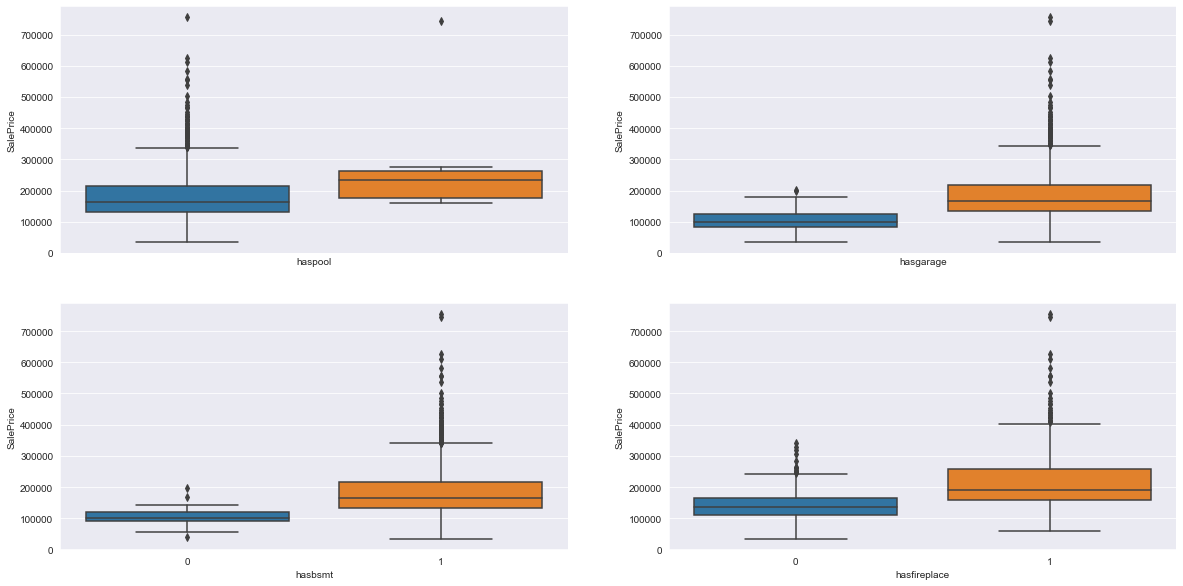

In [134]:
f, axes = plt.subplots(2, 2, figsize=(20, 10), sharex=True)
sns.boxplot(train_vis['haspool'],output_var,ax=axes[0,0])
sns.boxplot(train_vis['hasgarage'],output_var,ax=axes[0,1])
sns.boxplot(train_vis['hasbsmt'],output_var,ax=axes[1,0])
sns.boxplot(train_vis['hasfireplace'],output_var,ax=axes[1,1])

<h5>It is quite common that extra facilities will increase the price of house and our data proves it<h5>

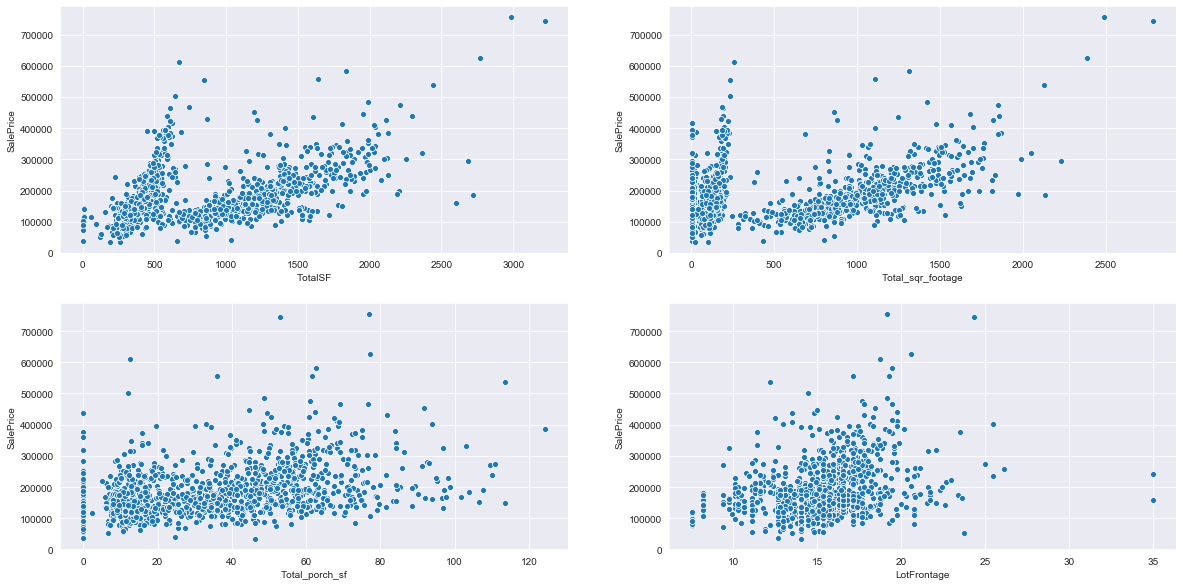

In [135]:
f, axes = plt.subplots(2, 2, figsize=(20, 10))
sns.scatterplot(x=train_vis.TotalSF,y=output_var,ax=axes[0,0])
sns.scatterplot(x=train_vis.Total_sqr_footage  ,y=output_var,ax=axes[0,1])
sns.scatterplot(x=train_vis.Total_porch_sf ,y=output_var,ax=axes[1,0])
sns.scatterplot(x=train_vis.LotFrontage,y=output_var,ax=axes[1,1])

<ul><li>Seems Total_porch_sf doesn't have much impact on sale price</li>
<li>Total_porch_sf Surface area doesn't seems to have much impact on price for half of the houses</li></ul>

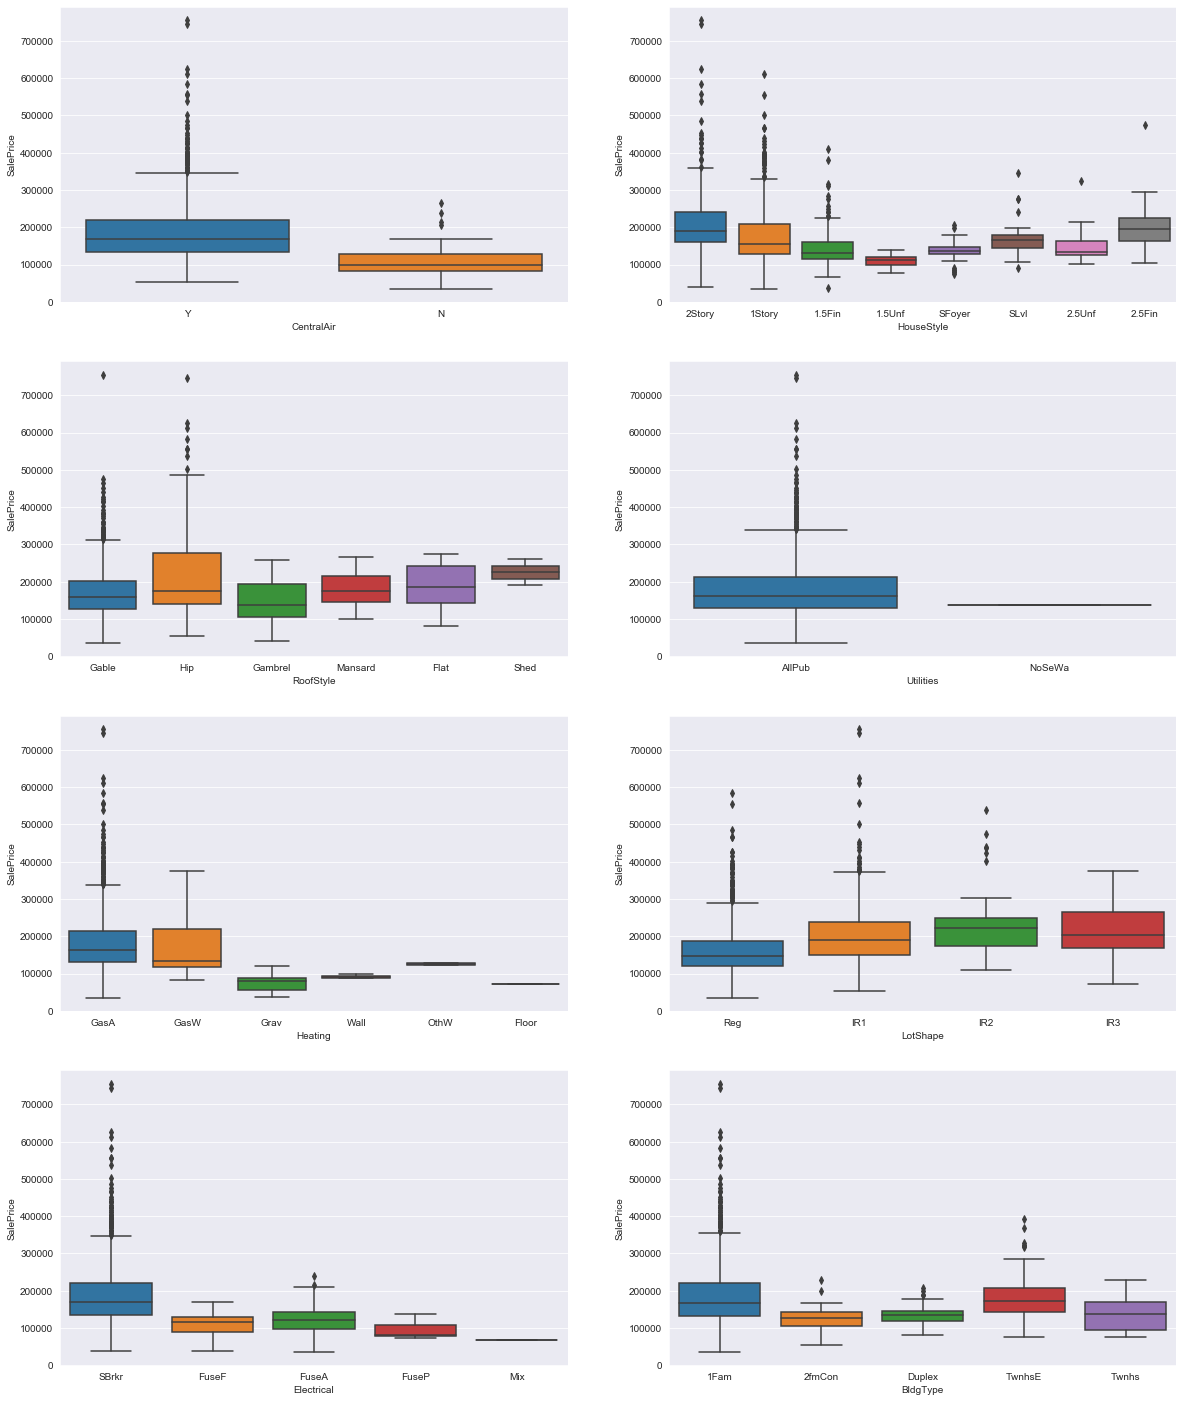

In [143]:
f, axes = plt.subplots(4, 2, figsize=(20, 25))
sns.boxplot(train_vis.CentralAir,output_var,ax=axes[0,0])
sns.boxplot(train_vis.HouseStyle,output_var,ax=axes[0,1])
sns.boxplot(train_vis.Utilities,output_var,ax=axes[1,1])
sns.boxplot(train_vis.Heating,output_var,ax=axes[2,0])
sns.boxplot(train_vis.LotShape,output_var,ax=axes[2,1])
sns.boxplot(train_vis.Electrical,output_var,ax=axes[3,0])
sns.boxplot(train_vis.BldgType,output_var,ax=axes[3,1])
sns.boxplot(train_vis.RoofStyle,output_var,ax=axes[1,0])

<h5>In the Above figure we can see how Price varies for different features</h5>

<h4>Handling Categorical data</h4>

In [30]:
combined = pd.get_dummies(combined,drop_first=True)

<h5>Now our data is processed and we are saving it in a file so that we don't need to perform the preprocessing again</h5>

In [31]:
combined.to_csv('data/combined',index=False)
combined.shape

(2919, 250)

Splitting data into train and test

In [32]:
train_X = combined[0:1460:]
test_X = combined[1460::]

In [158]:
train_X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.355302,-0.168513,-0.154007,0.651479,-0.508682,1.050994,0.878668,1.019595,0.719930,-0.350614,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-1.082732,0.511672,0.092318,-0.071836,2.139816,0.156734,-0.429577,-0.746843,1.180078,-0.350614,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,0.355302,-0.026864,0.402137,0.651479,-0.508682,0.984752,0.830215,0.869851,0.302210,-0.350614,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,0.587248,-0.411783,0.082186,0.651479,-0.508682,-1.863632,-0.720298,-0.746843,-0.314485,-0.350614,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,0.355302,0.682386,0.872886,1.374795,-0.508682,0.951632,0.733308,1.555512,0.627495,-0.350614,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [159]:
test_X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.075957,0.571915,0.557156,-0.751101,0.415442,-0.340945,-1.072885,-0.724864,0.276201,1.979078,...,-0.052432,-0.045392,-0.295268,-0.052432,0.398568,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
1,-1.075957,0.615176,0.986010,-0.054877,0.415442,-0.439695,-1.214908,0.618599,1.098604,-0.364041,...,-0.052432,-0.045392,-0.295268,-0.052432,0.398568,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
2,0.344406,0.306673,0.920480,-0.751101,-0.484916,0.844059,0.678742,-0.724864,0.877736,-0.364041,...,-0.052432,-0.045392,-0.295268,-0.052432,0.398568,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
3,0.344406,0.484603,0.242838,-0.054877,0.415442,0.876976,0.678742,-0.155614,0.538612,-0.364041,...,-0.052432,-0.045392,-0.295268,-0.052432,0.398568,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
4,1.437935,-1.270678,-1.130695,1.337571,-0.484916,0.679475,0.394694,-0.724864,-0.181576,-0.364041,...,-0.052432,-0.045392,-0.295268,-0.052432,0.398568,-0.074253,-0.091066,-0.134699,0.460211,-0.299365


<h3>Scaling the data.<h3>

In [33]:
sc_train = StandardScaler()
train_X=sc_train.fit_transform(train_X)
sc_test = StandardScaler()
test_X= sc_test.fit_transform(test_X)
sc_output = StandardScaler()
y = sc_output.fit_transform(output_var.values.reshape(-1,1))
train_X = pd.DataFrame(train_X,columns=[combined.columns])
test_X = pd.DataFrame(test_X,columns=[combined.columns])

In [155]:
print(train.shape,test.shape)

(1460, 74) (1459, 74)


In [156]:
train_X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.355302,-0.168513,-0.154007,0.651479,-0.508682,1.050994,0.878668,1.019595,0.719930,-0.350614,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-1.082732,0.511672,0.092318,-0.071836,2.139816,0.156734,-0.429577,-0.746843,1.180078,-0.350614,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,0.355302,-0.026864,0.402137,0.651479,-0.508682,0.984752,0.830215,0.869851,0.302210,-0.350614,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,0.587248,-0.411783,0.082186,0.651479,-0.508682,-1.863632,-0.720298,-0.746843,-0.314485,-0.350614,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,0.355302,0.682386,0.872886,1.374795,-0.508682,0.951632,0.733308,1.555512,0.627495,-0.350614,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [157]:
test_X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.075957,0.571915,0.557156,-0.751101,0.415442,-0.340945,-1.072885,-0.724864,0.276201,1.979078,...,-0.052432,-0.045392,-0.295268,-0.052432,0.398568,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
1,-1.075957,0.615176,0.986010,-0.054877,0.415442,-0.439695,-1.214908,0.618599,1.098604,-0.364041,...,-0.052432,-0.045392,-0.295268,-0.052432,0.398568,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
2,0.344406,0.306673,0.920480,-0.751101,-0.484916,0.844059,0.678742,-0.724864,0.877736,-0.364041,...,-0.052432,-0.045392,-0.295268,-0.052432,0.398568,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
3,0.344406,0.484603,0.242838,-0.054877,0.415442,0.876976,0.678742,-0.155614,0.538612,-0.364041,...,-0.052432,-0.045392,-0.295268,-0.052432,0.398568,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
4,1.437935,-1.270678,-1.130695,1.337571,-0.484916,0.679475,0.394694,-0.724864,-0.181576,-0.364041,...,-0.052432,-0.045392,-0.295268,-0.052432,0.398568,-0.074253,-0.091066,-0.134699,0.460211,-0.299365


<h3>4. Feature Extraction</h3>
<br>
Here we are not performing athis step as our data is low and we want to learn everything to get more accuracy on test.Even 0.01 improvement in accuracyuracy is very good for us

<h3>5. Model Building<h3>
Trying with Lasoo, Random Forest and Gradient Boosting 

In [34]:
rf = RandomForestRegressor()
rf.fit(train_X,y)
gb = GradientBoostingRegressor()
gb.fit(train_X,y)
ls = Lasso()
ls.fit(train_X,y)
y_pred = gb.predict(test_X)
y_pred = sc_output.inverse_transform(y_pred.reshape(-1,1))
y_pred1 = rf.predict(test_X)
y_pred1 = sc_output.inverse_transform(y_pred1.reshape(-1,1))
y_pred2 = ls.predict(test_X)
y_pred2 = sc_output.inverse_transform(y_pred2.reshape(-1,1))

In [35]:
output = pd.DataFrame()
output['Id'] = test_copy['Id']
output['SalePrice'] = y_pred
output.to_csv('GB',index=False)
output['SalePrice'] = y_pred1
output.to_csv('RF',index=False)
output['SalePrice'] = y_pred2
output.to_csv('Lasso',index=False)

<h4>Root mean square error from different algos</h4>
<ol><li>Gradient Boosting: 0.138</li>
<li>Random Forest:0.147</li>
<li>Lasso: 0.42</li>
</ol>

<h3>Model Tuning using GridsearchCV</h3>

<h4>Tuning Random Forest</h4>

In [ ]:
folds = KFold(n_splits=5,shuffle=True,random_state=7)

rf = RandomForestRegressor()
hyper_params_rf = [{
    'n_estimators':[10,50,100,500],
    'min_samples_split':[2,3,4,5],
    'max_depth':[2,5,7,100]
}]
model_rf = GridSearchCV(estimator=rf,
                       param_grid = hyper_params_rf,
                       scoring ='neg_mean_squared_error',
                       cv = folds,
                       verbose=1,
                       return_train_score=True,
                       n_jobs=16)
model_rf.fit(train_X,y)
model_rf.best_params_

In [37]:
rf = RandomForestRegressor(max_depth=100,min_samples_split=4,n_estimators=100)
rf.fit(train_X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [38]:
y_pred = rf.predict(test_X)
y_pred = sc_output.inverse_transform(y_pred.reshape(-1,1))
output['SalePrice'] = y_pred
output.to_csv('RF',index=False)

After tuning Random Forest It gave us root mean square of around 0.144 which is better than previous run

<h4>Tuning GradientBoostingRegressor</h4>

In [72]:
gb = GradientBoostingRegressor()
hyper_params_gb = [{
    'n_estimators':[50,100,150,200,300,500],
    'learning_rate':[0.1,0.3,0.6,0.75],
    'min_samples_split':[2,3,4,5,6],
    'min_samples_leaf':[1,2],
    'max_depth':[6,8,9,10,12,15,30,50]
    
}]
model_gb = GridSearchCV(estimator=gb,
                       param_grid = hyper_params_gb,
                       scoring ='neg_mean_squared_error',
                       cv = 2,
                       verbose=1,
                       return_train_score=True,
                       n_jobs=16)
model_gb.fit(train_X,y)
model_gb.best_params_

Fitting 2 folds for each of 1920 candidates, totalling 3840 fits


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:  1.0min
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:  5.1min
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed: 12.8min
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed: 21.6min
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed: 30.8min
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed: 37.3min
[Parallel(n_jobs=16)]: Done 2418 tasks      | elapsed: 43.6min
[Parallel(n_jobs=16)]: Done 3168 tasks      | elapsed: 48.7min
[Parallel(n_jobs=16)]: Done 3840 out of 3840 | elapsed: 52.2min finished


{'learning_rate': 0.1,
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 500}

In [66]:
gb = GradientBoostingRegressor(learning_rate=0.1,min_samples_leaf=1,min_samples_split=3,n_estimators=220,max_depth=8)
gb.fit(train_X,y)
y_pred = gb.predict(test_X)
y_pred = sc_output.inverse_transform(y_pred.reshape(-1,1)
output['SalePrice'] = y_pred
output.to_csv('GB',index=False)

This model after tuning gave us a root mean square error of 0.135 which is better than previous run. Lets tweak this model a bit more.

<h4>Tuning GradientBoostingRegressor further</h4>

In [74]:
gb = GradientBoostingRegressor()
hyper_params_gb = [{
    'n_estimators':[300,400,500,600,700,800],
    'learning_rate':[0.1],
    'min_samples_split':[2,3,4,5,6],
    'max_depth':[3,4,5,6,7,8,9,10]
    
}]
model_gb = GridSearchCV(estimator=gb,
                       param_grid = hyper_params_gb,
                       scoring ='neg_mean_squared_error',
                       cv = 2,
                       verbose=1,
                       return_train_score=True,
                       n_jobs=16)
model_gb.fit(train_X,y)
model_gb.best_params_

Fitting 2 folds for each of 240 candidates, totalling 480 fits


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:  1.1min
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:  6.7min
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed: 18.7min
[Parallel(n_jobs=16)]: Done 480 out of 480 | elapsed: 20.2min finished


{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 600}

In [75]:
gb = GradientBoostingRegressor(learning_rate=0.1,min_samples_leaf=1,min_samples_split=2,n_estimators=600,max_depth=3)
gb.fit(train_X,y)
y_pred = gb.predict(test_X)
y_pred = sc_output.inverse_transform(y_pred.reshape(-1,1))
output['SalePrice'] = y_pred
output.to_csv('GB',index=False)

This model after tuning gave us a root mean square error of 0.132 which is bit closer than previous model.

<h3>6. Stacking and Blending </h3>
<br>
Let's try stacking and blending which could help to improve the results. Here we are stacking GradientBoostingRegressor,RandomForestRegressor and passing its result to GradientBoostingRegressor

In [42]:
estimators = [('Gradient Boost',GradientBoostingRegressor(learning_rate=0.1,min_samples_leaf=1,min_samples_split=2,n_estimators=600,max_depth=3)),
              ('RandomForest',RandomForestRegressor(max_depth=50,min_samples_split=2,n_estimators=200)),
             ]

In [43]:
reg = StackingRegressor(
      estimators=estimators,
      final_estimator=GradientBoostingRegressor())

In [44]:
reg.fit(train_X,y)

StackingRegressor(cv=None,
                  estimators=[('Gradient Boost',
                               GradientBoostingRegressor(alpha=0.9,
                                                         ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='ls', max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
 

In [ ]:
y_pred = reg.predict(test_X)
y_pred = sc_output.inverse_transform(y_pred.reshape(-1,1))
output['SalePrice'] = y_pred
output.to_csv('COMB',index=False)

This stacking model gave us root mean square as 0.132 which is pretty good

<h3>Blending</h3>
When we mix the result of different models,which are performing good, with good weightage we could get a pretty good result.   

In [46]:
rf = pd.read_csv('RF')
gb = pd.read_csv('GB')
comb = pd.read_csv('COMB')
output['SalePrice'] = 0.52*comb['SalePrice']+0.32*gb['SalePrice']+0.15*rf['SalePrice']
output.to_csv('NEW2',index=False)

This gives a root mean square of 0.1288 which is quite better from all the previous models. 

<h3>7. Learnings and Conclusion</h3>
<br>
<ol><li>You need to handle your missing data properly so that you won't mess up with data.So understanding of features is quite important</li>
<li>As many ML models assume that the data follows Normal Distribution. So look for your Data. If data is skewed try to normalize it</li>
<li>Outlier plays a important role for model learning.Here I have not taken care of that. This is one thing one can play and get better results</li>
<li>If you are facing performance issues use PCA to reduce features</li>
<li>If you want to see your feature importance, you can fit ExtraTrees to data and use features_importances_ feature of it</li>
<li>Model Tuning, Stacking and Blending are very important techniques to imrove your model. So one can play on these, but always there is a trade off b/w accuracy and performance</li></ol>

<h3>8. Credits & References</h3>
<br>
<ol><li><a href = "https://www.kaggle.com/c/house-prices-advanced-regression-techniques">Project Link</a></li>
<li><a href="https://www.kaggle.com/jesucristo/1-house-prices-solution-top-1">https://www.kaggle.com/jesucristo/1-house-prices-solution-top-1</a></li></ol><h2>Thanks!!!<h2>